In [1]:
from lifelines import WeibullAFTFitter,LogLogisticAFTFitter,LogNormalAFTFitter, ExponentialFitter, LogLogisticFitter, LogNormalFitter, WeibullFitter
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
telco = pd.read_csv("data/telco.csv")

In [3]:
telco.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [4]:
print(f"Shape of Data: {telco.shape}")
print("")
print(f"Columns of Data: {telco.columns}")

print("")
print(f"NA values: {telco.isna().sum()}")

Shape of Data: (1000, 15)

Columns of Data: Index(['ID', 'region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn'],
      dtype='object')

NA values: ID          0
region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
retire      0
gender      0
voice       0
internet    0
forward     0
custcat     0
churn       0
dtype: int64


In [5]:
# Set the 'ID' column as the index of the telcoFrame
telco.set_index('ID', inplace=True)

# Convert the 'churn' column to binary values (1 for 'Yes', 0 for 'No') and update the DataFrame
telco['churn'] = pd.Series(np.where(telco.churn.values == "Yes", 1, 0), telco.index)

# Listing columns that need encodinh using one-hot encoding
encode_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']

# Perform one-hot encoding on the specified columns, dropping the first category to avoid multicollinearity
survival_data = pd.get_dummies(telco, columns=encode_cols, prefix=encode_cols, drop_first=True)

# Replace 0 values in 'tenure' column with a small positive value to avoid division by zero in later calculations
survival_data["tenure"] = np.where(survival_data["tenure"] == 0, 0.000001, survival_data["tenure"])

# Display the first few rows of the processed DataFrame
survival_data.head()


,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
ID,,,,,,,,,,,,,,,,,,,,
1,13.0,44,9,64,1,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,11.0,33,7,136,1,False,True,False,False,False,True,False,False,True,True,False,True,False,False,True
3,68.0,52,24,116,0,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,33.0,33,12,33,1,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
5,23.0,30,9,30,0,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False


In [6]:
# %pip install Jinja2

The AIC value for WeibullFitter is 3216.8611706815464
The BIC value for WeibullFitter is 3226.676681239511


<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.43
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef  se(coef)  coef lower 95%  coef upper 95%
lambda_ 138.09     12.38          113.82          162.36
rho_      0.95      0.05            0.85            1.05

         cmp to     z      p  -log2(p)
lambda_    1.00 11.07 <0.005     92.25
rho_       1.00 -1.07   0.29      1.80
---
AIC = 3216.86

The AIC value for ExponentialFitter is 3215.9608134637247
The BIC value for ExponentialFitter is 3220.868568742707


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.98
               hypothesis = lambda_ != 0

---
          coef  se(coef)  coef lower 95%  coef upper 95%
lambda_ 129.66      7.83          114.30          145.01

         cmp to     z      p  -log2(p)
lambda_    0.00 16.55 <0.005    202.03
---
AIC = 3215.96

The AIC value for LogNormalFitter is 3209.0351474316735
The BIC value for LogNormalFitter is 3218.850657989638


<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1602.52
               hypothesis = mu_ != 0, sigma_ != 1

---
        coef  se(coef)  coef lower 95%  coef upper 95%
mu_     4.77      0.10            4.57            4.98
sigma_  1.81      0.09            1.64            1.97

        cmp to     z      p  -log2(p)
mu_       0.00 46.06 <0.005       inf
sigma_    1.00  9.37 <0.005     66.94
---
AIC = 3209.04

The AIC value for LogLogisticFitter is 3214.4154757933375
The BIC value for LogLogisticFitter is 3224.230986351302


<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1605.21
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef  se(coef)  coef lower 95%  coef upper 95%
alpha_ 103.39      9.13           85.50          121.28
beta_    1.04      0.05            0.93            1.15

        cmp to     z      p  -log2(p)
alpha_    1.00 11.22 <0.005     94.60
beta_     1.00  0.73   0.46      1.11
---
AIC = 3214.42

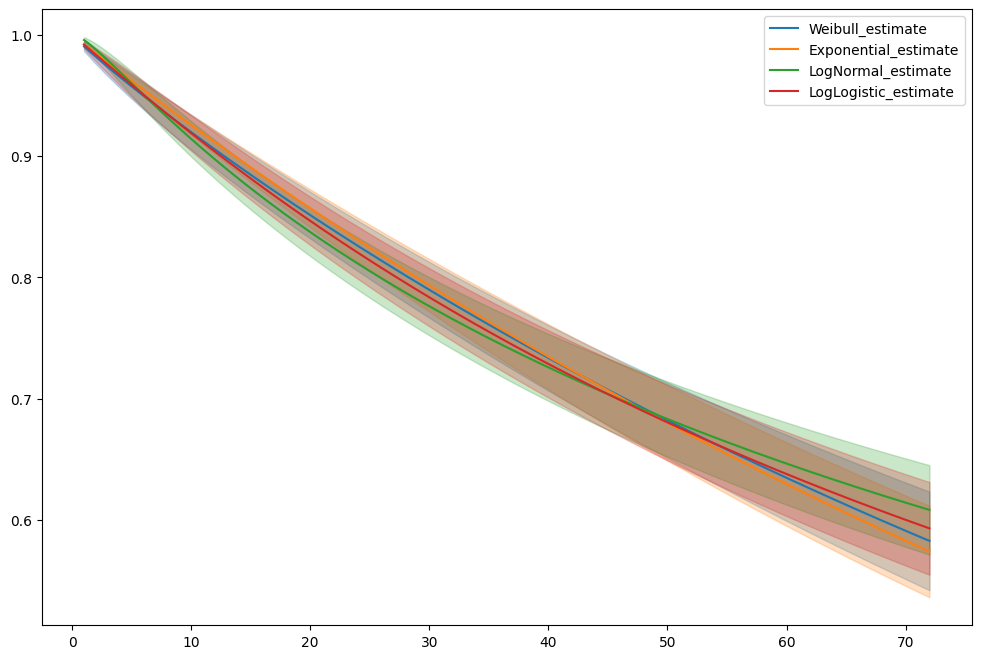

In [7]:
weibull_fitter = WeibullFitter()
exponential_fitter = ExponentialFitter()
log_normal_fitter = LogNormalFitter()
log_logistic_fitter = LogLogisticFitter()

fig, ax = plt.subplots(figsize=(12, 8))
fitters = [weibull_fitter, exponential_fitter, log_normal_fitter, log_logistic_fitter]
for model in fitters:
    model.fit(durations = survival_data["tenure"], event_observed = survival_data["churn"])
    model.plot_survival_function()
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)
    print("The BIC value for", model.__class__.__name__, "is",  model.BIC_)
    model.print_summary()
    print('='*100)

**Models with AFT fitters**

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2024-05-01 14:10:07 UTC

---
                                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                                        
lambda_ address                          0.04      1.04      0.01            0.02            0.06                1.02                1.06
        age                              0.03      1.03      0.01            0.01            0.04                1.01                1.04
        custcat_E-service                0.98      2.66      0.16            0.67            1.28                1.96                3.61
        custcat_Plus service             0.74      2.10      0.19            0.36            1.12                1.44                3.06
        custcat_Total service            1.00      2.71      0.21            0.58            1.41                1.78                4.11
        ed_Did not complete high school  0.44      1.55      0.19            0.06            0.82                1.06                2.27
        ed_High school degree            0.32      1.38      0.15            0.03            0.61                1.03                1.83
        ed_Post-undergraduate degree     0.22      1.25      0.19           -0.15            0.60                0.86                1.82
        ed_Some college                  0.25      1.29      0.14           -0.03            0.54                0.97                1.71
        forward_Yes                     -0.10      0.91      0.15           -0.39            0.19                0.68                1.21
        gender_Male                      0.00      1.00      0.10           -0.20            0.21                0.82                1.23
        income                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        internet_Yes                    -0.77      0.46      0.14           -1.04           -0.50                0.35                0.61
        marital_Unmarried               -0.35      0.71      0.10           -0.55           -0.14                0.58                0.87
        region_Zone 2                   -0.06      0.94      0.13           -0.31            0.19                0.73                1.21
        region_Zone 3                    0.12      1.12      0.13           -0.13            0.36                0.87                1.44
        retire_Yes                       0.17      1.19      0.52           -0.85            1.19                0.43                3.30
        voice_Yes                       -0.34      0.72      0.15           -0.63           -0.04                0.53                0.96
        Intercept                        2.78     16.14      0.27            2.25            3.31                9.48               27.47
rho_    Intercept                        0.17      1.19      0.05            0.07            0.27                1.08                1.32

                                         cmp to     z      p  -log2(p)
param   covariate                                                     
lambda_ address                            0.00  4.69 <0.005     18.47
        age                                0.00  4.12 <0.005     14.69
        custcat_E-service                  0.00  6.28 <0.005     31.44
        custcat_Plus service               0.00  3.83 <0.005     12.95
        custcat_Total service              0.00  4.67 <0.005     18.35
        ed_Did not complete high school    0.00  2.25   0.02      5.37
        ed_High school degree              0.00  2.19   0.03    

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2024-05-01 14:10:08 UTC

---
                                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                        
mu_    address                          0.04      1.04      0.01            0.03            0.06                1.03                1.06
       age                              0.03      1.03      0.01            0.02            0.05                1.02                1.05
       custcat_E-service                1.07      2.90      0.17            0.73            1.40                2.08                4.06
       custcat_Plus service             0.92      2.52      0.22            0.50            1.35                1.65                3.85
       custcat_Total service            1.20      3.32      0.25            0.71            1.69                2.03                5.42
       ed_Did not complete high school  0.37      1.45      0.20           -0.02            0.77                0.98                2.16
       ed_High school degree            0.32      1.37      0.16           -0.00            0.64                1.00                1.89
       ed_Post-undergraduate degree    -0.03      0.97      0.22           -0.47            0.40                0.62                1.50
       ed_Some college                  0.27      1.31      0.17           -0.05            0.60                0.95                1.82
       forward_Yes                     -0.20      0.82      0.18           -0.55            0.15                0.58                1.17
       gender_Male                      0.05      1.05      0.11           -0.17            0.28                0.84                1.32
       income                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
       internet_Yes                    -0.77      0.46      0.14           -1.05           -0.49                0.35                0.61
       marital_Unmarried               -0.46      0.63      0.12           -0.68           -0.23                0.51                0.80
       region_Zone 2                   -0.10      0.91      0.14           -0.38            0.18                0.69                1.20
       region_Zone 3                    0.05      1.05      0.14           -0.23            0.33                0.80                1.38
       retire_Yes                       0.02      1.02      0.44           -0.85            0.89                0.43                2.44
       voice_Yes                       -0.43      0.65      0.17           -0.76           -0.10                0.47                0.90
       Intercept                        2.36     10.61      0.29            1.79            2.94                5.98               18.84
sigma_ Intercept                        0.28      1.32      0.05            0.19            0.37                1.20                1.44

                                        cmp to     z      p  -log2(p)
param  covariate                                                     
mu_    address                            0.00  4.78 <0.005     19.11
       age                                0.00  4.50 <0.005     17.19
       custcat_E-service                  0.00  6.25 <0.005     31.21
       custcat_Plus service               0.00  4.29 <0.005     15.75
       custcat_Total service              0.00  4.79 <0.005     19.16
       ed_Did not complete high school    0.00  1.85   0.06      3.97
       ed_High school degree              0.00  1.94   0.05      4.24
       ed_Post-undergr

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2024-05-01 14:10:09 UTC

---
                                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                        
alpha_ address                          0.04      1.04      0.01            0.02            0.06                1.02                1.06
       age                              0.03      1.03      0.01            0.02            0.05                1.02                1.05
       custcat_E-service                1.04      2.83      0.17            0.72            1.36                2.05                3.91
       custcat_Plus service             0.86      2.37      0.21            0.45            1.27                1.57                3.57
       custcat_Total service            1.20      3.33      0.24            0.73            1.67                2.08                5.34
       ed_Did not complete high school  0.43      1.54      0.20            0.04            0.82                1.05                2.28
       ed_High school degree            0.34      1.40      0.15            0.03            0.64                1.03                1.89
       ed_Post-undergraduate degree    -0.02      0.98      0.22           -0.45            0.40                0.64                1.49
       ed_Some college                  0.24      1.27      0.16           -0.06            0.55                0.94                1.73
       forward_Yes                     -0.19      0.82      0.17           -0.53            0.14                0.59                1.15
       gender_Male                      0.04      1.04      0.11           -0.18            0.26                0.84                1.29
       income                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
       internet_Yes                    -0.80      0.45      0.14           -1.07           -0.52                0.34                0.60
       marital_Unmarried               -0.45      0.64      0.11           -0.66           -0.23                0.52                0.80
       region_Zone 2                   -0.05      0.95      0.14           -0.31            0.22                0.73                1.24
       region_Zone 3                    0.11      1.12      0.14           -0.15            0.38                0.86                1.46
       retire_Yes                       0.06      1.06      0.48           -0.87            1.00                0.42                2.71
       voice_Yes                       -0.40      0.67      0.16           -0.72           -0.08                0.49                0.92
       Intercept                        2.33     10.33      0.28            1.78            2.89                5.95               17.93
beta_  Intercept                        0.34      1.40      0.05            0.24            0.44                1.27                1.55

                                        cmp to     z      p  -log2(p)
param  covariate                                                     
alpha_ address                            0.00  4.42 <0.005     16.60
       age                                0.00  4.67 <0.005     18.36
       custcat_E-service                  0.00  6.30 <0.005     31.62
       custcat_Plus service               0.00  4.13 <0.005     14.74
       custcat_Total service              0.00  5.00 <0.005     20.73
       ed_Did not complete high school    0.00  2.18   0.03      5.11
       ed_High school degree              0.00  2.17   0.03      5.04
       ed_Post-under

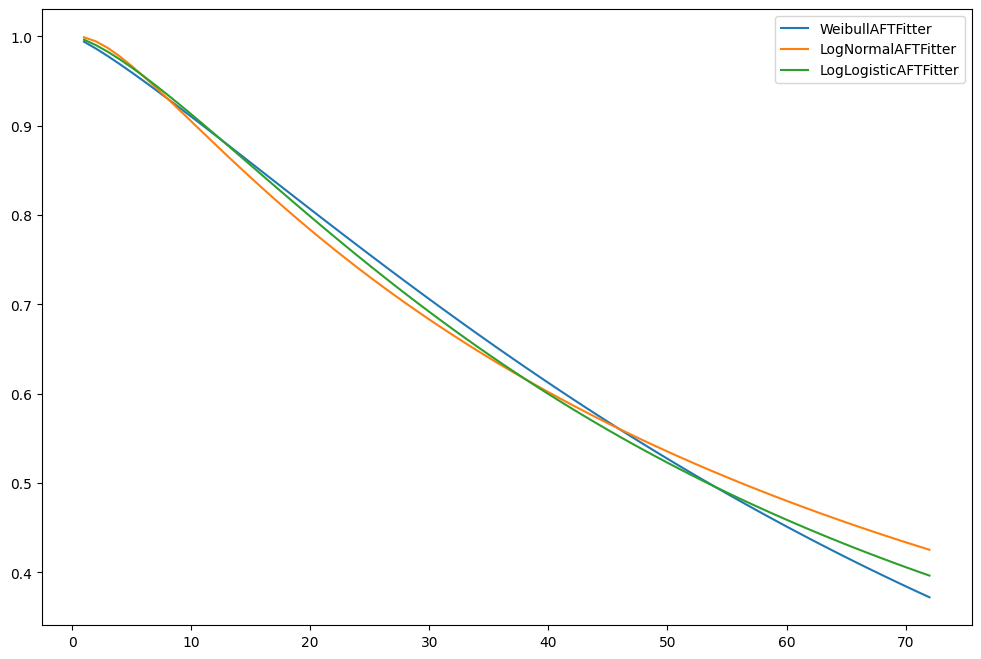

In [8]:
weibull_fitter_aft = WeibullAFTFitter()
log_normal_fitter_aft = LogNormalAFTFitter()
log_logistic_fitter_aft = LogLogisticAFTFitter()

survival_data["tenure"] = np.where(survival_data["tenure"] == 0, 0.000001, survival_data["tenure"])

fig, ax = plt.subplots(figsize=(12, 8))

i = 1
for model in [weibull_fitter_aft, log_normal_fitter_aft, log_logistic_fitter_aft ]:
    model.fit(survival_data, duration_col = "tenure", event_col = "churn")
    if i == 1:
        label = "WeibullAFTFitter"
    elif i == 2:
        label = "LogNormalAFTFitter"
    elif i == 3:
        label = "LogLogisticAFTFitter"
    i = i + 1
    model.print_summary()
    print('='*100)
    plt.plot(model.predict_survival_function(survival_data.loc[1]), label = label)
    plt.legend()

LogNormalFitter performs the best as it has the lowest AIC and BIC scores and also its log-likelihood value is the highest.

So I will continue with LogNormalFitter as AFT Fitter.

In [9]:
log_normal_aft_fitter = LogNormalAFTFitter()
log_normal_aft_fitter.fit(survival_data, duration_col='tenure', event_col='churn')
log_normal_aft_fitter.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2024-05-01 14:10:09 UTC

---
                                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                        
mu_    address                          0.04      1.04      0.01            0.03            0.06                1.03                1.06
       age                              0.03      1.03      0.01            0.02            0.05                1.02                1.05
       custcat_E-service                1.07      2.90      0.17            0.73            1.40                2.08                4.06
       custcat_Plus service             0.92      2.52      0.22            0.50            1.35                1.65                3.85
       custcat_Total service            1.20      3.32      0.25            0.71            1.69                2.03                5.42
       ed_Did not complete high school  0.37      1.45      0.20           -0.02            0.77                0.98                2.16
       ed_High school degree            0.32      1.37      0.16           -0.00            0.64                1.00                1.89
       ed_Post-undergraduate degree    -0.03      0.97      0.22           -0.47            0.40                0.62                1.50
       ed_Some college                  0.27      1.31      0.17           -0.05            0.60                0.95                1.82
       forward_Yes                     -0.20      0.82      0.18           -0.55            0.15                0.58                1.17
       gender_Male                      0.05      1.05      0.11           -0.17            0.28                0.84                1.32
       income                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
       internet_Yes                    -0.77      0.46      0.14           -1.05           -0.49                0.35                0.61
       marital_Unmarried               -0.46      0.63      0.12           -0.68           -0.23                0.51                0.80
       region_Zone 2                   -0.10      0.91      0.14           -0.38            0.18                0.69                1.20
       region_Zone 3                    0.05      1.05      0.14           -0.23            0.33                0.80                1.38
       retire_Yes                       0.02      1.02      0.44           -0.85            0.89                0.43                2.44
       voice_Yes                       -0.43      0.65      0.17           -0.76           -0.10                0.47                0.90
       Intercept                        2.36     10.61      0.29            1.79            2.94                5.98               18.84
sigma_ Intercept                        0.28      1.32      0.05            0.19            0.37                1.20                1.44

                                        cmp to     z      p  -log2(p)
param  covariate                                                     
mu_    address                            0.00  4.78 <0.005     19.11
       age                                0.00  4.50 <0.005     17.19
       custcat_E-service                  0.00  6.25 <0.005     31.21
       custcat_Plus service               0.00  4.29 <0.005     15.75
       custcat_Total service              0.00  4.79 <0.005     19.16
       ed_Did not complete high school    0.00  1.85   0.06      3.97
       ed_High school degree              0.00  1.94   0.05      4.24
       ed_Post-undergr

In [10]:
significant_columns = log_normal_aft_fitter.summary.loc[log_normal_aft_fitter.summary['p'] < 0.005, 'coef']
print("Columns with p-value < 0.005:")
print(significant_columns)

Columns with p-value < 0.005:
param   covariate            
mu_     address                  0.042538
        age                      0.032670
        custcat_E-service        1.066401
        custcat_Plus service     0.924929
        custcat_Total service    1.198617
        internet_Yes            -0.771490
        marital_Unmarried       -0.455134
        Intercept                2.362263
sigma_  Intercept                0.275772
Name: coef, dtype: float64


So in order for a feature to be considered significant, its p-value must be less than 0.05 and based on the observations, these features are shown to be significan - address, age, custcat_E-service, custcat_Plus service, custcat_Total service, internet_Yes, marital_Unmarried.

Moreover, the coefficient column indicates the impact of these features on the customer's survival time: a positive coefficient implies an increase, while a negative coefficient implies a decrease. 

Thus, I will retain only the significant features.

In [11]:
survival_data = survival_data[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried"]]

log_normal_aft_fitter_new = LogNormalAFTFitter()
log_normal_aft_fitter_new.fit(survival_data, duration_col='tenure', event_col='churn')

log_normal_aft_fitter_new.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1465.97
         time fit was run = 2024-05-01 14:10:10 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                              
mu_    address                0.04      1.05      0.01            0.03            0.06                1.03                1.06
       age                    0.04      1.04      0.01            0.02            0.05                1.02                1.05
       custcat_E-service      1.00      2.71      0.17            0.67            1.33                1.95                3.78
       custcat_Plus service   0.73      2.08      0.17            0.41            1.05                1.50                2.87
       custcat_Total service  0.66      1.93      0.17            0.33            0.98                1.39                2.67
       internet_Yes          -0.89      0.41      0.14           -1.16           -0.62                0.31                0.54
       marital_Unmarried     -0.46      0.63      0.11           -0.68           -0.23                0.51                0.79
       Intercept              2.54     12.67      0.24            2.06            3.02                7.87               20.41
sigma_ Intercept              0.29      1.33      0.05            0.20            0.38                1.22                1.46

                              cmp to     z      p  -log2(p)
param  covariate                                           
mu_    address                  0.00  5.02 <0.005     20.87
       age                      0.00  5.63 <0.005     25.75
       custcat_E-service        0.00  5.90 <0.005     28.00
       custcat_Plus service     0.00  4.42 <0.005     16.60
       custcat_Total service    0.00  3.96 <0.005     13.71
       internet_Yes             0.00 -6.43 <0.005     32.85
       marital_Unmarried        0.00 -3.97 <0.005     13.77
       Intercept                0.00 10.44 <0.005     82.34
sigma_ Intercept                0.00  6.24 <0.005     31.11
---
Concordance = 0.78
AIC = 2949.94
log-likelihood ratio test = 273.09 on 7 df
-log2(p) of ll-ratio test = 180.97

From here, for example, for each unit increase in 'address', 'age', 'custcat_E-service', 'custcat_Plus service', and 'custcat_Total service', the survival time increases by a factor of exp(coef).


**CLV**

In [12]:
predictions_clv = log_normal_aft_fitter_new.predict_survival_function(survival_data)
print(predictions_clv)

ID        1         2         3         4         5         6         7     \
1.0   0.999657  0.999787  0.999998  0.997855  0.999818  0.999905  0.995960   
2.0   0.997980  0.998667  0.999983  0.990256  0.998835  0.999343  0.983364   
3.0   0.994929  0.996530  0.999937  0.978920  0.996931  0.998187  0.965973   
4.0   0.990743  0.993504  0.999853  0.965326  0.994208  0.996461  0.946176   
5.0   0.985658  0.989737  0.999722  0.950402  0.990793  0.994228  0.925275   
...        ...       ...       ...       ...       ...       ...       ...   
68.0  0.590947  0.640119  0.932473  0.378645  0.655189  0.714980  0.302812   
69.0  0.586687  0.636015  0.931031  0.374487  0.651146  0.711251  0.298999   
70.0  0.582478  0.631955  0.929587  0.370403  0.647145  0.707553  0.295263   
71.0  0.578320  0.627937  0.928141  0.366391  0.643185  0.703886  0.291601   
72.0  0.574211  0.623962  0.926692  0.362450  0.639264  0.700250  0.288011   

ID        8         9         10    ...      991       992     

In [20]:
predictions_one_year = predictions_clv.loc[1:12, :]  #this will be for one year
print(predictions_one_year.head())

ID       1         2         3         4         5         6         7     \
1.0  0.999657  0.999787  0.999998  0.997855  0.999818  0.999905  0.995960   
2.0  0.498990  0.499334  0.499991  0.495128  0.499417  0.499672  0.491682   
3.0  0.248732  0.249133  0.249984  0.244730  0.249233  0.249547  0.241493   
4.0  0.123843  0.124188  0.124982  0.120666  0.124276  0.124558  0.118272   
5.0  0.061604  0.061859  0.062483  0.059400  0.061925  0.062139  0.057830   

ID       8         9         10    ...      991       992       993   \
1.0  0.993855  0.999991  0.999996  ...  0.999744  0.999946  0.999443   
2.0  0.488180  0.499958  0.499980  ...  0.499217  0.499800  0.498465   
3.0  0.238371  0.249932  0.249966  ...  0.248995  0.249713  0.248144   
4.0  0.116048  0.124926  0.124961  ...  0.124068  0.124712  0.123350   
5.0  0.056412  0.062434  0.062465  ...  0.061770  0.062260  0.061247   

ID       994       995       996       997       998       999       1000  
1.0  0.999999  0.999802  0.9

In [14]:
warnings.filterwarnings("ignore")

monthly_margin = 1300
monthly_discount_rate = 12

for segment_index in range(1, len(predictions_one_year.columns) + 1):
    for time_period_index in range(1, 13):
        predictions_one_year[segment_index][time_period_index] = predictions_one_year[segment_index][time_period_index] / (1 + monthly_discount_rate / 12) ** (time_period_index - 1)

telco['CLV'] = monthly_margin * predictions_one_year.sum(axis=0)

In [15]:
telco.head()

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
ID,,,,,,,,,,,,,,,
1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,1,2591.159938
2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,1,2593.632763
3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,0,2599.227367
4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,1,2567.243626
5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,0,2594.258910


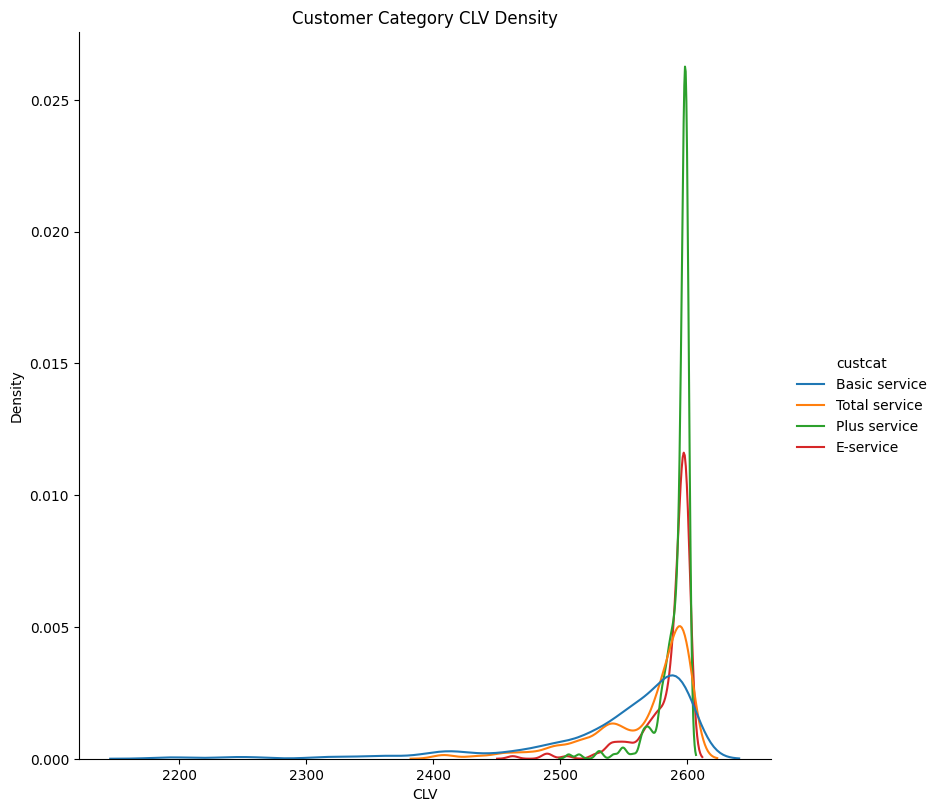

In [16]:
# Replicate each row in the DataFrame 16 times
telco_expanded = telco.loc[telco.index.repeat(16)]

# Plot the Customer Lifetime Value (CLV) distribution using kernel density estimation (kde)
clv_plot = sns.displot(data=telco_expanded, x='CLV', kind='kde', hue='custcat', height=8)


clv_plot.set(title='Customer Category CLV Density')
plt.show()


Plus Service: customers for this category are the most likely to survive

In [17]:
print(f'CLV of customers that left within one year: {telco["CLV"].loc[(telco["tenure"] <= 12) & (telco["churn"] == 1)].mean()}')
print(f'Yearly CLV of cutomers that left: {telco["CLV"].loc[(telco["tenure"] <= 12) & (telco["churn"] == 1)].sum()}')

CLV of customers that left within one year: 2517.845411586518
Yearly CLV of cutomers that left: 264373.7682165844


In [19]:
# Extract the predicted CLV values from the last column of the transposed DataFrame
predicted_clv_values = predictions_one_year.T.iloc[:, -1].values
print(f'Total CLV budget for customers with a tenure of 12 months or less and predicted CLV values less than 0.9: {telco["CLV"].loc[(telco["tenure"] <= 12) & (predicted_clv_values < 0.9)].sum()}')

Total CLV budget for customers with a tenure of 12 months or less and predicted CLV values less than 0.9: 457370.77654632216


In analyzing the model's coefficients, we gain insights into how each covariate affects the mean or median survival time of our customers. Specifically, a unit increase in a covariate corresponds to a change in the mean or median survival time by a factor of exp(coefficient). When the coefficient is positive, exp(coefficient) exceeds 1, indicating an increase in the incident/event time. Conversely, a negative coefficient indicates a reduction in the mean or median survival time.


For instance, a unit increase in variables such as age and address is associated with a 4% increase in survival time. Conversely, being unmarried compared to being married is linked to a 46% decrease in survival time. These insights allow us to understand how demographic and behavioral factors influence customer longevity.

The definition of a valuable customer revolves around their CLV, reflecting their capacity to yield considerable revenue or profit for the company over time. Examining CLV density plots across diverse segments reveals that individuals who are married, not retired, or enrolled in the plus service emerge as potentially valuable customers, with some factors including the gender having minimal influence on this determination.

In my case  I used a thershold of 0.9 whch means, if a customer's survival probability falls below it, they are deemed at-risk.

Subsequently, aggregating the expected values for these at-risk customers allows us to estimate the total annual value of the at-risk subscriber base.This estimation serves as the maximum annual budget that can be allocated to retention activities while ensuring a positive return on investment.

Various strategies can be employed to tackle the retention challenge:
    
- Enhancing customer service
- Implementing loyalty programs such as exclusive promotions or discounts for at-risk customers
- Conducting targeted marketing campaigns to re-engage customers
- Personalized communication efforts
- Proactive outreach to dissatisfied customers
- Offering incentives for referrals
- Continuous monitoring of customer feedback to address issues promptly
